In [116]:
!pip install torch

In [117]:
!pip install torch-geometric

In [118]:
!pip install networkx

In [119]:
!pip install --upgrade gdown


In [120]:
import networkx as nx
from torch_geometric.utils import from_networkx

In [121]:
import gdown

# File ID from the Google Drive URL
file_id = '1NcxDNrYQPW7-rAxjml9W3mAWcg8HaO_s'

# Create a direct download link
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'ENG_LAB_20240514_1625_DM_br_du_DM_inner_R18_edu.graphml'
gdown.download(url, output, quiet=False)

print(f"File downloaded as {output}")


Downloading...
From: https://drive.google.com/uc?id=1NcxDNrYQPW7-rAxjml9W3mAWcg8HaO_s
To: /content/ENG_LAB_20240514_1625_DM_br_du_DM_inner_R18_edu.graphml
100%|██████████| 3.80M/3.80M [00:00<00:00, 229MB/s]

File downloaded as ENG_LAB_20240514_1625_DM_br_du_DM_inner_R18_edu.graphml


In [122]:
import networkx as nx
from torch_geometric.utils import from_networkx

# Path to the downloaded file
file_path = 'ENG_LAB_20240514_1625_DM_br_du_DM_inner_R18_edu.graphml'

graph = nx.read_graphml(file_path)
data = from_networkx(graph)
print(data)




Data(edge_index=[2, 10860], domain_type=[934], whitelist=[934], competition_list=[934], ignore_list=[934], auto_cd_list=[934], custom_list_1=[934], custom_list_2=[934], distance=[934], label=[934], node_type=[934], mutual=[934], nx_PageRank_br=[934], nx_degree_lr=[934], nx_cb_degree_lr=[934], nx_out_degree_br=[934], nx_cb_out_degree_br=[934], nx_in_degree_br=[934], nx_cb_in_degree_br=[934], nx_closeness_lr=[934], nx_outward_closeness_br=[934], nx_inward_closeness_br=[934], nx_betweenness_lr=[934], nx_cb_betweenness_lr=[934], nx_directed_betweenness_br=[934], nx_cb_directed_betweenness_br=[934], meta_title_common_count=[934], meta_title_nss=[934], meta_description_common_count=[934], meta_description_nss=[934], consider_for_backlinks=[934], consider_for_backlinks_list_2=[934], consider_disavowing=[934], noise=[934], meta_description_common_count_norm=[934], meta_title_common_count_norm=[934], nx_cb_directed_betweenness_br_norm=[934], nx_directed_betweenness_br_norm=[934], nx_cb_betweenn

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")



Number of nodes: 934
Number of edges: 10860


**Степен на јазол** (node degree) е бројот на врски (или ребра) што ги има тој јазол со други јазли во мрежата. Степенската дистрибуција ни кажува колку јазли имаат одреден степен.

In [125]:
degree_distribution = dict(graph.degree())
print("Degree distribution:")
# Ќе се испечатат првите 10 јазли со степен
print(list(degree_distribution.items())[:10])


Degree distribution:
[('labour.org.uk', 185), ('conservatives.com', 141), ('greenparty.org.uk', 171), ('libdems.org.uk', 191), ('party.coop', 132), ('reformparty.uk', 148), ('sdp.org.uk', 123), ('womensequality.org.uk', 126), ('laboursites.org', 44), ('jostevens.co.uk', 14)]


In [126]:
# Да се најдат најважните јазли според степен
top_nodes = sorted(degree_distribution.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by degree:")
print(top_nodes)

Top 10 nodes by degree:
[('whocanivotefor.co.uk', 309), ('getitdaily.com', 300), ('webot.org', 278), ('earthspot.org', 257), ('eth.link', 229), ('cybernode.ai', 219), ('casplantje.nl', 219), ('libdems.org.uk', 191), ('1d4.us', 187), ('labour.org.uk', 185)]


Визуелизација на граф

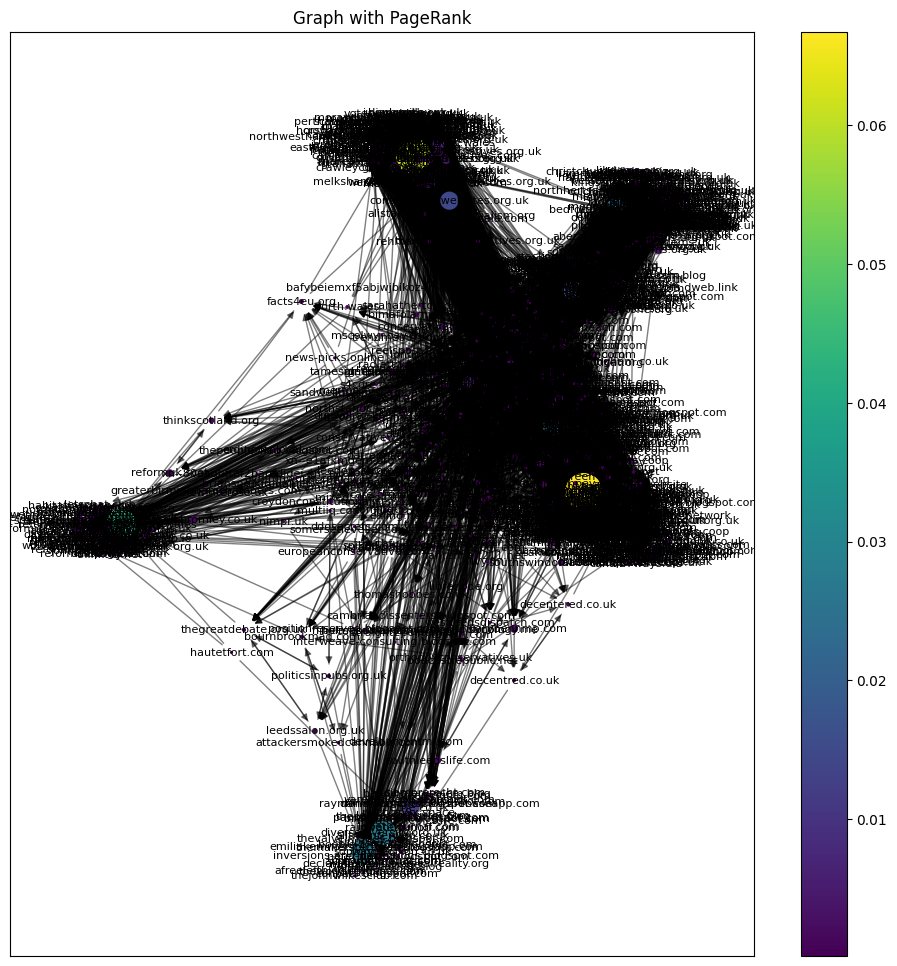

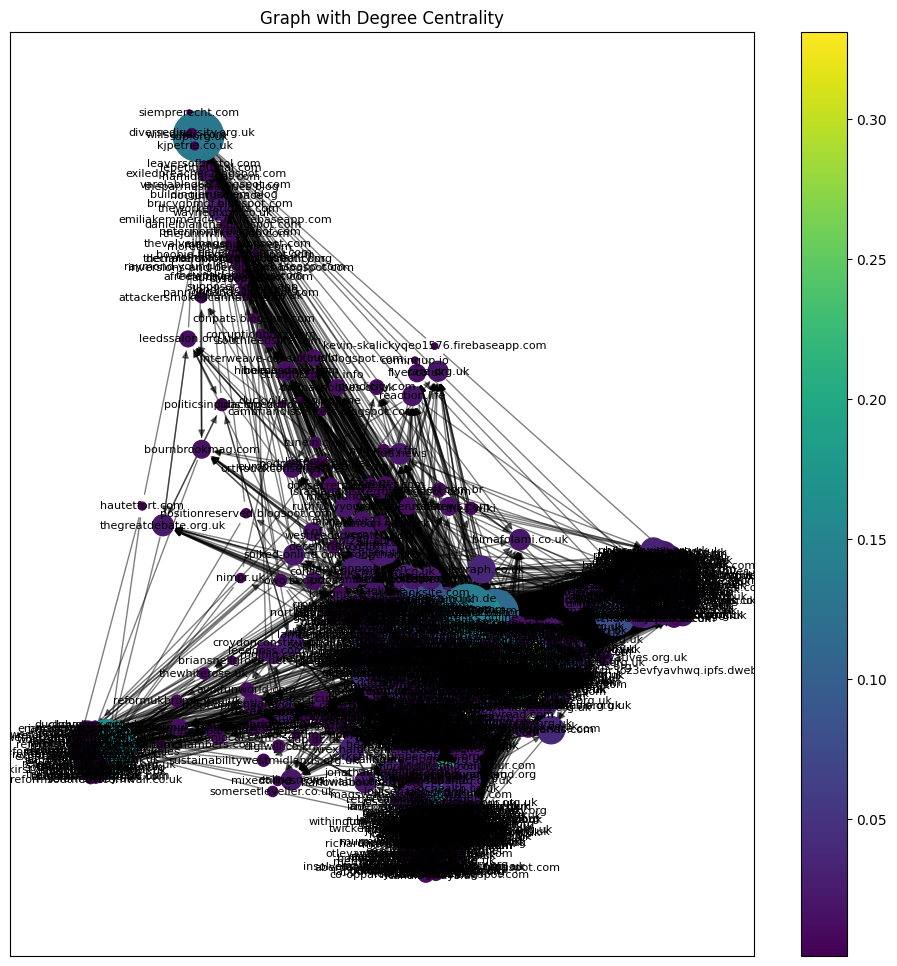

In [127]:
import matplotlib.pyplot as plt


pagerank = nx.pagerank(graph)
degree_centrality = nx.degree_centrality(graph)

# Plotting function
def plot_graph(graph, title, node_size_metric):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph)
    nodes = nx.draw_networkx_nodes(
        graph, pos, node_size=[v * 10000 for v in node_size_metric.values()],
        node_color=list(node_size_metric.values()), cmap=plt.cm.viridis)
    edges = nx.draw_networkx_edges(graph, pos, alpha=0.5)
    labels = nx.draw_networkx_labels(graph, pos, font_size=8)
    plt.title(title)
    plt.colorbar(nodes)
    plt.show()


# Визуелизација PageRank
plot_graph(graph, 'Graph with PageRank', pagerank)

# Визуекизација Degree Centrality
plot_graph(graph, 'Graph with Degree Centrality', degree_centrality)



Приказ на атрибути на пет јазли од графот


In [128]:
# Check node attributes for a few nodes
sample_nodes = list(graph.nodes(data=True))[:5]
for node, attr in sample_nodes:
    print(f"Node: {node}, Attributes: {attr}")


Node: labour.org.uk, Attributes: {'domain_type': 'principal', 'whitelist': 'yes', 'competition_list': 'no', 'ignore_list': 'no', 'auto_cd_list': 'no', 'custom_list_1': 'no', 'custom_list_2': 'no', 'distance': 0, 'label': 'labour.org.uk', 'node_type': 'DM', 'mutual': 'yes', 'nx_PageRank_br': 0.0775, 'nx_degree_lr': 130, 'nx_cb_degree_lr': 69, 'nx_out_degree_br': 60, 'nx_cb_out_degree_br': 56, 'nx_in_degree_br': 125, 'nx_cb_in_degree_br': 68, 'nx_closeness_lr': 0.4039, 'nx_outward_closeness_br': 0.1888, 'nx_inward_closeness_br': 0.3012, 'nx_betweenness_lr': 0.0208, 'nx_cb_betweenness_lr': 0.0531, 'nx_directed_betweenness_br': 0.1186, 'nx_cb_directed_betweenness_br': 0.196, 'meta_title_common_count': 0, 'meta_title_nss': 0.0, 'meta_description_common_count': 0, 'meta_description_nss': 0.0, 'consider_for_backlinks': 'no', 'consider_for_backlinks_list_2': 'no', 'consider_disavowing': 'no', 'noise': 'no', 'meta_description_common_count_norm': 0.0, 'meta_title_common_count_norm': 0.0, 'nx_cb_

Визуелизација


Хистограм за степенска дистрибуција на јазлите во графот

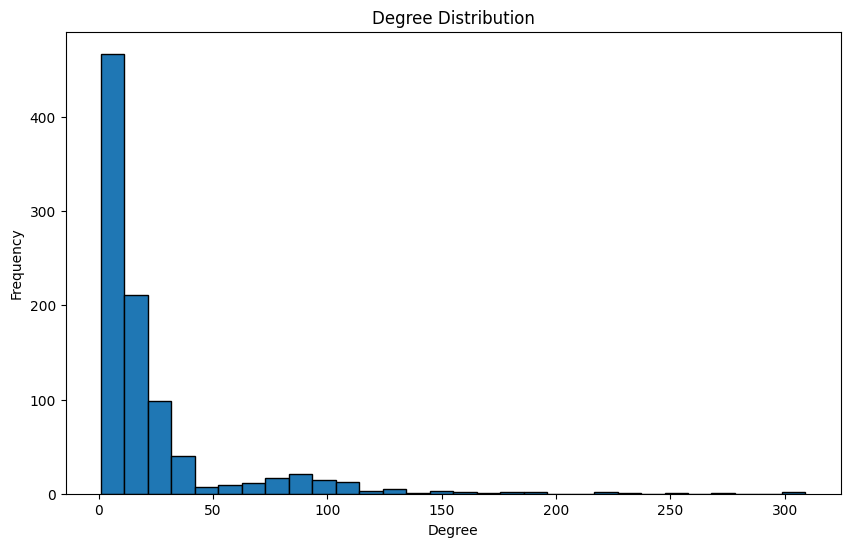

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution.values(), bins=30, edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


Пресметување степенска и меѓусебна централност

**Degree Centrality** на јазол е дефинирана како бројот на врски (ребра) што ги има јазолот, нормализиран со максималниот можен број на врски.

**Betweenness Centrality** на јазол се дефинира како бројот на кратки патишта што минуваат низ тој јазол, нормализирани со бројот на парови на јазли во графот.

In [130]:
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)

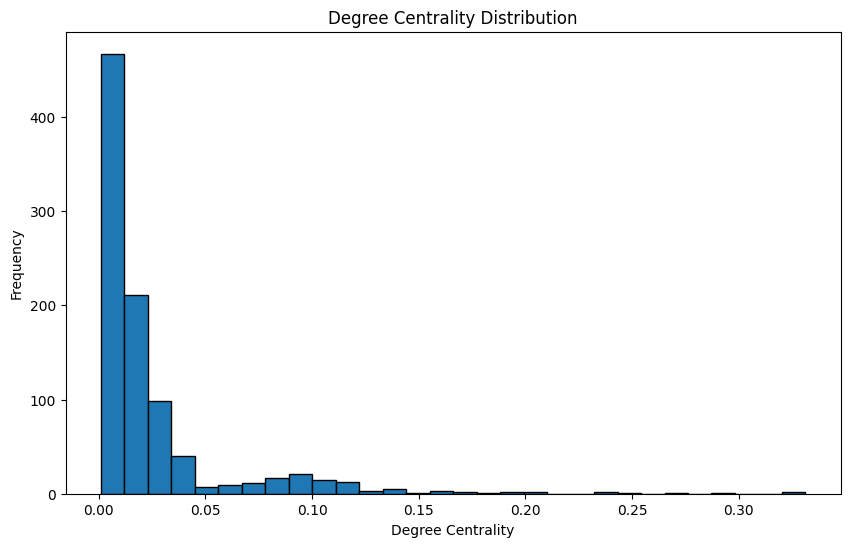

In [131]:
# Визуелизација со Degree Centrality
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=30, edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

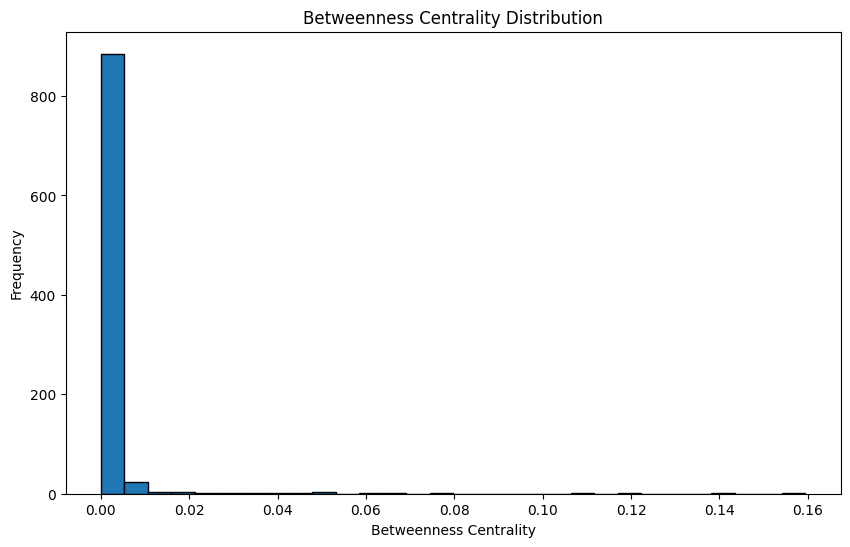

In [132]:
# Визуелизација со Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=30, edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()



In [133]:
# Најди ги топ 10 јазли според централност
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by degree centrality:")
print(top_degree_centrality)
print("Top 10 nodes by betweenness centrality:")
print(top_betweenness_centrality)

Top 10 nodes by degree centrality:
[('whocanivotefor.co.uk', 0.3311897106109325), ('getitdaily.com', 0.3215434083601286), ('webot.org', 0.2979635584137192), ('earthspot.org', 0.2754555198285102), ('eth.link', 0.2454448017148982), ('cybernode.ai', 0.23472668810289388), ('casplantje.nl', 0.23472668810289388), ('libdems.org.uk', 0.20471596998928188), ('1d4.us', 0.20042872454448016), ('labour.org.uk', 0.1982851018220793)]
Top 10 nodes by betweenness centrality:
[('conservativehome.com', 0.1594543956103522), ('greenparty.org.uk', 0.1434097372277862), ('whocanivotefor.co.uk', 0.14039588193159233), ('labour.org.uk', 0.1186172339667385), ('conservativewebsites.org.uk', 0.10988835193252522), ('conservatives.com', 0.07531303117990117), ('libdems.org.uk', 0.06571024952003979), ('reformparty.uk', 0.06390860769103415), ('government-world.com', 0.05941902759112855), ('womensequality.org.uk', 0.05268509022105295)]


In [134]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
import matplotlib.pyplot as plt

In [135]:
data = from_networkx(graph)

# Додај произволни карактеристики за јазлите во графот, доколку тие не постојат
if not hasattr(data, 'x') or data.x is None:
    num_nodes = data.num_nodes
    # Користиме identity matrix како карактеристики
    data.x = torch.eye(num_nodes)


Edge Prediction

In [136]:
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def compute_directed_features(graph):
    features = []
    for u, v in nx.non_edges(graph):
        # Compute directed features
        in_degree_u = graph.in_degree(u)
        in_degree_v = graph.in_degree(v)
        out_degree_u = graph.out_degree(u)
        out_degree_v = graph.out_degree(v)
        features.append([in_degree_u, in_degree_v, out_degree_u, out_degree_v])
    return np.array(features)

In [137]:
# Create a function for generating labels
def create_labels(graph, non_edges):
    labels = []
    for u, v in non_edges:
        labels.append(1 if graph.has_edge(u, v) else 0)
    return np.array(labels)

In [138]:
# Generate features and labels
non_edges = list(nx.non_edges(graph))
X = compute_directed_features(graph)
y = create_labels(graph, non_edges)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [140]:
# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [141]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    258169

    accuracy                           1.00    258169
   macro avg       1.00      1.00      1.00    258169
weighted avg       1.00      1.00      1.00    258169



# **Graph Convolutional Network (GCN) модел**

In [142]:
# GCN модел
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# **Graph Attention Network (GAT) модел**

In [143]:
# GAT model
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


In [144]:
if 'y' not in data:
    num_nodes = data.num_nodes
    data.y = torch.randint(0, 2, (num_nodes,))

Функција за тренирање и евалуација на моделите

In [145]:
from torch_geometric.data import DataLoader

# Дефинирање на model, optimizer, и функција на загуба
def train_model(model, data, epochs=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    data = data.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = torch.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Евалуација
    model.eval()
    with torch.no_grad():
        pred = model(data).argmax(dim=1)
        acc = (pred[data.test_mask] == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
        print(f'Accuracy: {acc:.4f}')

Иницијализација на GCN модел и тренирање на моделот со податоците од графот

In [146]:
gcn_model = GCN(in_channels=data.num_node_features, hidden_channels=64, out_channels=2)

data.train_mask = torch.rand(data.num_nodes) < 0.8
data.test_mask = ~data.train_mask

print("Training GCN Model")
train_model(gcn_model, data)

Training GCN Model
Epoch 1/100, Loss: 0.6941694021224976
Epoch 2/100, Loss: 0.6850728392601013
Epoch 3/100, Loss: 0.6749510169029236
Epoch 4/100, Loss: 0.6644617319107056
Epoch 5/100, Loss: 0.6522142291069031
Epoch 6/100, Loss: 0.6386212706565857
Epoch 7/100, Loss: 0.6244498491287231
Epoch 8/100, Loss: 0.6094663739204407
Epoch 9/100, Loss: 0.594190776348114
Epoch 10/100, Loss: 0.5788795948028564
Epoch 11/100, Loss: 0.5638446807861328
Epoch 12/100, Loss: 0.549230694770813
Epoch 13/100, Loss: 0.5355551838874817
Epoch 14/100, Loss: 0.5225093960762024
Epoch 15/100, Loss: 0.5102522969245911
Epoch 16/100, Loss: 0.4989110827445984
Epoch 17/100, Loss: 0.4883650541305542
Epoch 18/100, Loss: 0.47846394777297974
Epoch 19/100, Loss: 0.4690391719341278
Epoch 20/100, Loss: 0.4599212110042572
Epoch 21/100, Loss: 0.45104384422302246
Epoch 22/100, Loss: 0.4423706531524658
Epoch 23/100, Loss: 0.43401476740837097
Epoch 24/100, Loss: 0.42604273557662964
Epoch 25/100, Loss: 0.4185168147087097
Epoch 26/100,

Иницијализација на GАТ модел и тренирање на моделот со податоците од графот

In [147]:
gat_model = GAT(in_channels=data.num_node_features, hidden_channels=64, out_channels=2)

data.train_mask = torch.rand(data.num_nodes) < 0.8
data.test_mask = ~data.train_mask

print("Training GAT Model")
train_model(gat_model, data)


Training GAT Model
Epoch 1/100, Loss: 0.6936050057411194
Epoch 2/100, Loss: 0.6862117648124695
Epoch 3/100, Loss: 0.6776020526885986
Epoch 4/100, Loss: 0.6672909259796143
Epoch 5/100, Loss: 0.655367910861969
Epoch 6/100, Loss: 0.6419073939323425
Epoch 7/100, Loss: 0.6272046566009521
Epoch 8/100, Loss: 0.6116792559623718
Epoch 9/100, Loss: 0.5956785678863525
Epoch 10/100, Loss: 0.5795301795005798
Epoch 11/100, Loss: 0.5635331273078918
Epoch 12/100, Loss: 0.5478924512863159
Epoch 13/100, Loss: 0.5328455567359924
Epoch 14/100, Loss: 0.5186102986335754
Epoch 15/100, Loss: 0.5053796172142029
Epoch 16/100, Loss: 0.49326592683792114
Epoch 17/100, Loss: 0.4817633628845215
Epoch 18/100, Loss: 0.47031790018081665
Epoch 19/100, Loss: 0.4586924910545349
Epoch 20/100, Loss: 0.44739556312561035
Epoch 21/100, Loss: 0.4370725750923157
Epoch 22/100, Loss: 0.4276011288166046
Epoch 23/100, Loss: 0.4188254773616791
Epoch 24/100, Loss: 0.4109189808368683
Epoch 25/100, Loss: 0.40339982509613037
Epoch 26/100

Визуелизација на GCN и GAT моделите

In [148]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_embeddings(model, data):
    model.eval()
    with torch.no_grad():
        # Ensure data is structured correctly and model is expecting the data format
        if hasattr(data, 'x') and hasattr(data, 'edge_index'):
            embeddings = model(data).cpu().numpy()
        else:
            raise ValueError("Data object does not have required attributes 'x' and 'edge_index'")

        # Apply PCA to reduce dimensionality
        pca = PCA(n_components=2)
        reduced_embeddings = pca.fit_transform(embeddings)

        # Create the scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=data.y.cpu().numpy(), cmap='coolwarm', s=10)
        plt.colorbar(label='Node Labels')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('Node Embeddings')
        plt.show()


Visualizing GCN Embeddings


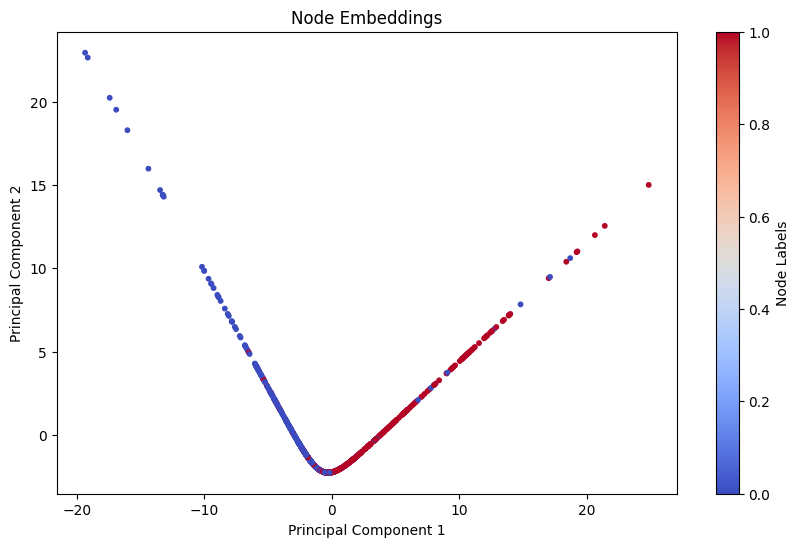

In [149]:
print("Visualizing GCN Embeddings")
visualize_embeddings(gcn_model, data)

Visualizing GAT Embeddings


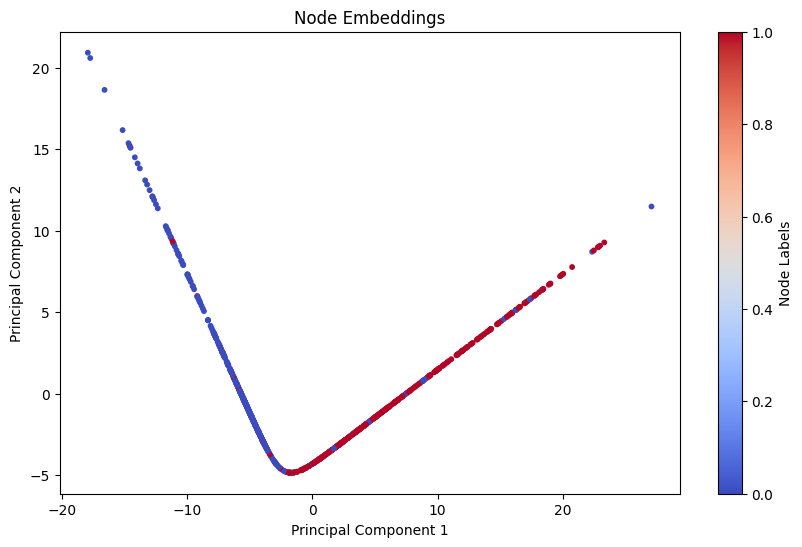

In [150]:
print("Visualizing GAT Embeddings")
visualize_embeddings(gat_model, data)

GCN Edge Prediction

In [151]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.utils import train_test_split_edges, negative_sampling
from sklearn.metrics import classification_report


In [152]:
# Assuming 'graph' is a NetworkX graph that has been properly converted
# Check and convert graph to PyTorch Geometric Data object
edge_list = list(graph.edges())
edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
x = torch.eye(graph.number_of_nodes())
data = Data(x=x, edge_index=edge_index)

# Define the RandomLinkSplit transform
transform = RandomLinkSplit(
    num_val=0.1,  # Fraction of edges to use for validation
    num_test=0.1,  # Fraction of edges to use for testing
    is_undirected=True  # Specify if the graph is undirected
)

# Apply the transform to the data
train_data = transform(data)

# Convert labels to float tensors
train_data.train_pos_edge_label = train_data.train_pos_edge_label.float()
train_data.train_neg_edge_label = train_data.train_neg_edge_label.float()
train_data.val_pos_edge_label = train_data.val_pos_edge_label.float()
train_data.val_neg_edge_label = train_data.val_neg_edge_label.float()
train_data.test_pos_edge_label = train_data.test_pos_edge_label.float()
train_data.test_neg_edge_label = train_data.test_neg_edge_label.float()

# Print the data attributes to verify
print("Training Positive Edge Labels:", train_data.train_pos_edge_label)
print("Training Negative Edge Labels:", train_data.train_neg_edge_label)
print("Validation Positive Edge Labels:", train_data.val_pos_edge_label)
print("Validation Negative Edge Labels:", train_data.val_neg_edge_label)
print("Test Positive Edge Labels:", train_data.test_pos_edge_label)
print("Test Negative Edge Labels:", train_data.test_neg_edge_label)

ValueError: too many dimensions 'str'

In [ ]:
class GCNEdgePredictor(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCNEdgePredictor, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels * 2, 1)  # Change to hidden_channels * 2

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        # Edge embeddings: concatenate features of the nodes forming the edge
        edge_embeddings = self.get_edge_embeddings(x, edge_index)
        x = self.fc(edge_embeddings)
        return torch.sigmoid(x).squeeze()

In [ ]:
 def get_edge_embeddings(self, x, edge_index):
        # Get node embeddings for both nodes in each edge
        row, col = edge_index
        x_i = x[row]
        x_j = x[col]
        # Concatenate node embeddings
        edge_embeddings = torch.cat([x_i, x_j], dim=1)
        return edge_embeddings


Предизвик

a) How might graph-related characteristics (from the existing dataset) be harnessed to improve
the identification of junk sites?


a) Како може да се искористат карактеристиките поврзани со графиконот (од постојната база на податоци) за да се подобри
идентификувањето на junk sites?

In [ ]:
!pip install scikit-learn

Извлекување на карактеристиките од графот и претворање во DataFrame

In [ ]:
import networkx as nx
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features = pd.DataFrame({
    'node_id': list(graph.nodes()),
    'degree': [val for node, val in graph.degree()],
    'clustering': [val for node, val in nx.clustering(graph).items()],
    'closeness': [val for node, val in nx.closeness_centrality(graph).items()],
    'betweenness': [val for node, val in nx.betweenness_centrality(graph).items()],
    'pagerank': [val for node, val in nx.pagerank(graph).items()]
})

# Display the features dataframe
print(features.head())

In [ ]:
features

Тренирање на модел за класификација, користејќи RandomForestClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Example target variable (replace this with your actual target labels)
features['target'] = (features['degree'] > features['degree'].median()).astype(int)

# Split data into features and target
X = features.drop(columns=['node_id', 'target'])
y = features['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Резултатите ни покажуваат дека моделот има совршена прецизност, опфат и f1-score, што укажува на тоа дека моделот е многу успешен во идентификацијата на добрите и лошите веб-страници.


In [ ]:
# Преглед на атрибутите на првиот јазел од графот
node = list(graph.nodes())[0]
print(graph.nodes[node])


Предизвик:

b) How else might the graph be enriched to improve the options for identifying junk sites?


б) Како на друг начин може да се збогати графикот за да се подобрат опциите за идентификација на непотребни страници?

In [ ]:
import networkx as nx

# Пресметка на PageRank
pagerank = nx.pagerank(graph)
nx.set_node_attributes(graph, pagerank, 'pagerank')

# Пресметка Кластерски Коефициент
clustering = nx.clustering(graph)
nx.set_node_attributes(graph, clustering, 'clustering_coefficient')

# Пресметка Централност по Степен
degree_centrality = nx.degree_centrality(graph)
nx.set_node_attributes(graph, degree_centrality, 'degree_centrality')

# Проверка на ажурираните атрибути на јазлите
for node, data in graph.nodes(data=True):
    print(node, data)


Извлекување на клучни зборови и анализа на текстуални атрибути на јазлите во графот

In [ ]:
import re
from textblob import TextBlob

def extract_keywords(text):
    # Едноставно извлекување на клучни зборови врз база на фреквенција
    words = re.findall(r'\w+', text.lower())
    return {word: words.count(word) for word in set(words)}

def analyze_sentiment(text):
    analysis = TextBlob(text) # објект за анализа на текстот
    return analysis.sentiment.polarity

for node in graph.nodes(data=True):
    if 'content' in node[1]:
        content = node[1]['content']
        keywords = extract_keywords(content)
        sentiment = analyze_sentiment(content)
        graph.nodes[node[0]]['keywords'] = keywords
        graph.nodes[node[0]]['sentiment'] = sentiment

# Провери ги ажурираните атрибути на јазлите со содржински карактеристики
for node, data in graph.nodes(data=True):
    print(node, data)

In [ ]:
# import networkx as nx
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report

# # Example function to add content-based features (dummy implementation)
# def get_content_features(node_id):
#     # Replace with actual content analysis
#     return {
#         'keyword_density': 0.1,
#         'content_length': 1000
#     }

# # Extract features from the graph
# features = pd.DataFrame({
#     'node_id': list(graph.nodes()),
#     'degree': [val for node, val in graph.degree()],
#     'clustering': [val for node, val in nx.clustering(graph).items()],
#     'closeness': [val for node, val in nx.closeness_centrality(graph).items()],
#     'betweenness': [val for node, val in nx.betweenness_centrality(graph).items()],
#     'pagerank': [val for node, val in nx.pagerank(graph).items()]
# })

# # Add content-based features
# content_features = pd.DataFrame([get_content_features(node) for node in features['node_id']])
# features = pd.concat([features, content_features], axis=1)

# # Example target variable (replace with actual target labels)
# features['target'] = (features['degree'] > features['degree'].median()).astype(int)

# # Split data into features and target
# X = features.drop(columns=['node_id', 'target'])
# y = features['target']

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Train a RandomForestClassifier with hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
# }
# clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
# clf.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))


Заклучок и Препораки Со додавање на овие дополнителни карактеристики, ќе обезбедиме побогат датасет кој ќе ни помогне подобро да ги идентификуваме спам сајтовите. Ова вклучува временски податоци, интерактивни податоци, надворешни референци и квалитет на содржина.